<a href="https://colab.research.google.com/github/mnimno/Airbnb-data-analyst123/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
#Importing Important liberaries. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Importing Dataset from drive folder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [5]:
#Reading the Data set using read_csv function. 
file_path = '/content/Airbnb NYC 2019 (2).csv'
df = pd.read_csv(file_path)




In [6]:
#Analysing the dataframe using df.head() function. 
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
#Different columns showing up in Dataframe.
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [8]:
#Finding out datatypes using df.info() Method. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
df.shape

(48895, 16)

In [10]:
#Checking count,mean,standard deviation,minimum values,25%,50%,75%,and maximum values using describe() function. 
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [11]:
#Finding total number of null values. 
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [12]:
Df_Final = df.fillna(value = 0)

In [13]:
#Rechecking if null values still available in dataframe using isnull() function. 
Df_Final.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [14]:
#Searched null values if any. 
Df_Final.isnull().any()

id                                False
name                              False
host_id                           False
host_name                         False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                       False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [15]:
Df_Final.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Length: 48895, dtype: bool

In [16]:
#Observing correlation amomgst different colmuns
Df_Final.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.180221,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.209783,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.018758,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.138516,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,0.180221,0.209783,-0.018758,0.138516,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000


In [17]:
#In df_max variable using only those important columns in which we need to find interconnection about hosts, minimum nights spent and neighbourhood_group(location). 
df_Max =  Df_Final[['host_name','neighbourhood_group','minimum_nights']]
df_Max


,host_name,neighbourhood_group,minimum_nights
0,John,Brooklyn,1
1,Jennifer,Manhattan,1
2,Elisabeth,Manhattan,3
3,LisaRoxanne,Brooklyn,1
4,Laura,Manhattan,10
...,...,...,...
48890,Sabrina,Brooklyn,2
48891,Marisol,Brooklyn,4
48892,Ilgar & Aysel,Manhattan,10
48893,Taz,Manhattan,1


In [18]:
#Top 10 rows. 
df_Max.head(10)

,host_name,neighbourhood_group,minimum_nights
0,John,Brooklyn,1
1,Jennifer,Manhattan,1
2,Elisabeth,Manhattan,3
3,LisaRoxanne,Brooklyn,1
4,Laura,Manhattan,10
5,Chris,Manhattan,3
6,Garon,Brooklyn,45
7,Shunichi,Manhattan,2
8,MaryEllen,Manhattan,2
9,Ben,Manhattan,1


In [19]:
#Finding out maximum value for minimum_nights coulmn to find out minimum_nights were spent on which host's room.
df_Max.loc[df_Max['minimum_nights'].idxmax()]

host_name              Genevieve
neighbourhood_group    Manhattan
minimum_nights              1250
Name: 5767, dtype: object

In [20]:
#Sorted  minimum_nights column in ascending order only taking top 10 to anaylise in which hosts room maximum number of nights were spent. 
df_minimum_nights = df_Max.sort_values(['minimum_nights'],ascending=False).head(10)
df_minimum_nights

,host_name,neighbourhood_group,minimum_nights
5767,Genevieve,Manhattan,1250
2854,Peter,Manhattan,1000
38664,Meg,Manhattan,999
13404,Glenn H.,Manhattan,999
26341,Angie,Brooklyn,999
47620,Meg,Brooklyn,500
14285,Amanda,Brooklyn,500
8014,John,Manhattan,500
11193,Laura,Brooklyn,500
7355,Aliya,Queens,500


What we can learn from different hosts and areas?

1. **Host named Genevieve from Manhattan received highest number of Visitors, followed by others**. 

3. **On an Average price is higher in Manhattan and lower in Bronx**.

4. **Top 10 hosts in terms of availability is John, Koppel , Billie , Sonder ,  Dustin, 
 Anthony, Belkis, Alex, Joe and Ruchi**.






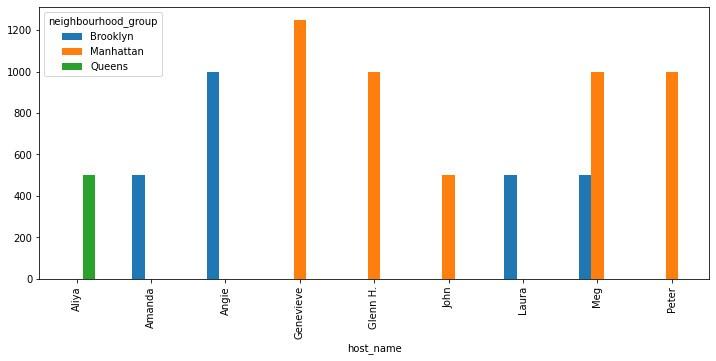

In [21]:
#Creating a bar graph of the observation, host named Genevieve from Manhattan received highest number of Visitors followed by others.
df_minimum_nights.pivot(index='host_name', columns ='neighbourhood_group', values ='minimum_nights').plot(kind='bar', figsize=(12,5))
plt.show()


In [22]:
df_listings = Df_Final.groupby(['host_name'])['calculated_host_listings_count'].mean()
df_listings

host_name
0                           1.380952
'Cil                        1.000000
(Ari) HENRY LEE             1.000000
(Email hidden by Airbnb)    1.333333
(Mary) Haiy                 1.000000
                              ...   
단비                          1.000000
빈나                          1.000000
소정                          1.000000
진                           1.000000
현선                          1.000000
Name: calculated_host_listings_count, Length: 11453, dtype: float64

In [23]:
#Analysing which city has the highest average cost. Manhattan has the highest cost followed by Brooklyn, Staten Island, Queens, Bronx. 
df_average1 = Df_Final.groupby(['neighbourhood_group'])['price'].mean()
df_average1

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

Text(0, 0.5, 'average cost of room')

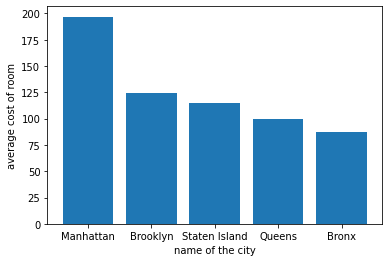

In [24]:
#creating a new variables to assign strings and integers to reflect it in the bar graph. 
city_name = ['Manhattan', 'Brooklyn', 'Staten Island', 'Queens', 'Bronx']
city_price = [196.87,124.38,114.81,99.51,87.49]
plt.bar(city_name,city_price)
plt.xlabel('name of the city')
plt.ylabel('average cost of room')



In [25]:
df_availability = Df_Final[['host_name','availability_365']]
df_availability

,host_name,availability_365
0,John,365
1,Jennifer,355
2,Elisabeth,365
3,LisaRoxanne,194
4,Laura,0
...,...,...
48890,Sabrina,9
48891,Marisol,36
48892,Ilgar & Aysel,27
48893,Taz,2


In [26]:
df_4 = df_availability.sort_values(['availability_365'],ascending=False).head(10)
df_4

,host_name,availability_365
0,John,365
11591,Koppel,365
41757,Billie,365
41747,Sonder (NYC),365
41742,Dustin,365
11496,Anthony,365
41679,Belkis,365
11576,Alex,365
41675,Joe,365
11590,Ruchi,365


In [27]:
Df_Final.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [28]:
Df_Final.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


2. What we can learn from predictions?

 **Entire home/Apartment type is mostly available**. 

 **On an average price is higher for entire home/apartment and lowest for  Shared room**. 

 **Manhattan has the highest number of entries and the lowest is for Staten Island**.

 **Listing wise Manhattan tops the list compared to other cities, Staten Island is in bottom**

 **Host named Dona got the highest number of reviews**.

 **Top 7 hosts with highest number of reviews are Dona, JJ, Maya, Carol, Daniel, Asa, Wanda**.

 **The most expensive Room is in Queens with the price of 1000**. 

 **Host named Nalicia has the highest number of reviews per month**.




In [29]:
Differentroom_types = Df_Final.room_type.value_counts().sort_values(ascending=False).head(10)
Differentroom_types

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

Text(0, 0.5, 'Total available rooms')

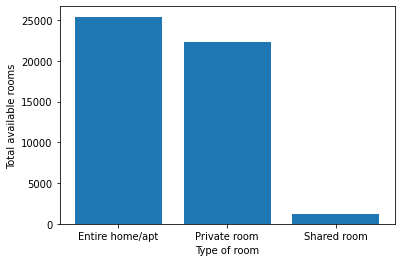

In [30]:
#creating a new variables to assign strings and integers to reflect it in the bar graph. 
Room_type = ['Entire home/apt','Private room','Shared room']
Room_Availability = [25409,22326,1160]
plt.bar(Room_type,Room_Availability)
plt.xlabel('Type of room')
plt.ylabel('Total available rooms')

In [31]:
#Finding out the avarage price for different types of room. 
df_average = Df_Final.groupby(['room_type'])['price'].mean()
df_average

room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64

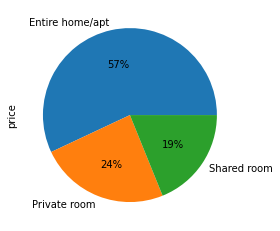

In [32]:
#plotting a pie chart for above information
df_average.groupby(['room_type']).sum().plot(
    kind='pie', y='price', autopct='%1.0f%%')

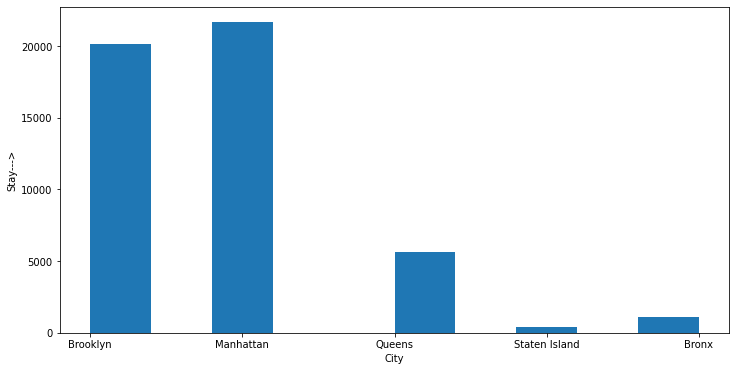

In [33]:
#Finding out the highest number of entries for the cities. 
fig,ax = plt.subplots(figsize=(12,6))
ax.hist(Df_Final['neighbourhood_group'])
ax.set_xlabel('City')
ax.set_ylabel('Stay--->')
plt.show()


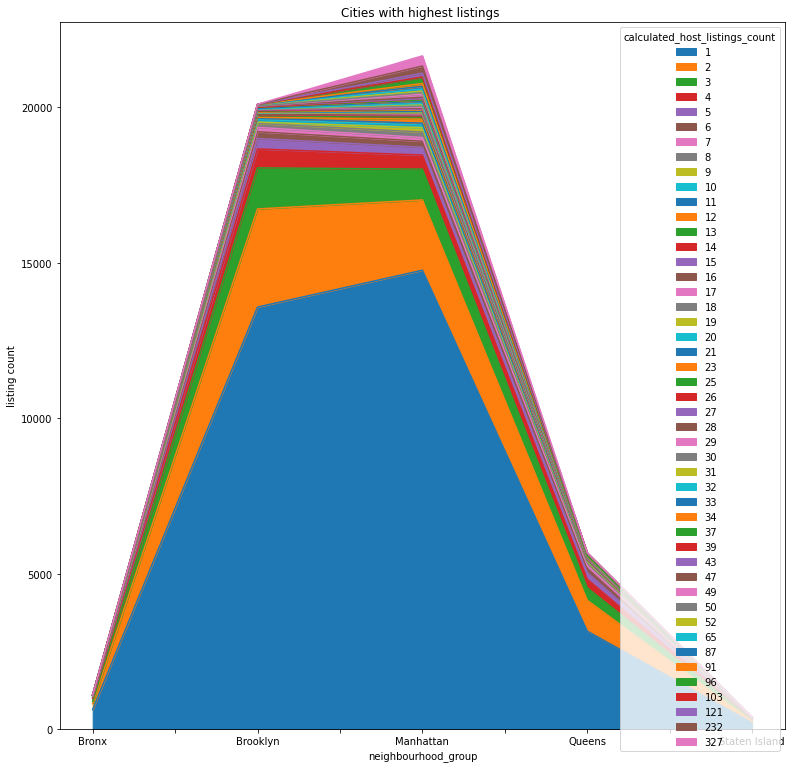

In [34]:
pd.crosstab(Df_Final.neighbourhood_group, Df_Final.calculated_host_listings_count).plot(kind='area',figsize=(13,13))
plt.title('Cities with highest listings ')
plt.ylabel('listing count')
plt.show()

In [35]:
#Assigning a new variable with 3 columns to understand which host got the highest reviews. 
df_2 = Df_Final[['host_name','number_of_reviews','price']]

In [36]:
#Sorting oyt top 10 hosts with highest rev iews. 
df_Sort1 = df_2.sort_values(['number_of_reviews'],ascending=False).head(10)


In [38]:
#Final results. 
df_Sort1

,host_name,number_of_reviews,price
11759,Dona,629,47
2031,Jj,607,49
2030,Jj,597,49
2015,Jj,594,49
13495,Dona,576,47
10623,Maya,543,46
1879,Carol,540,99
20403,Danielle,510,48
4870,Asa,488,160
471,Wanda,480,60


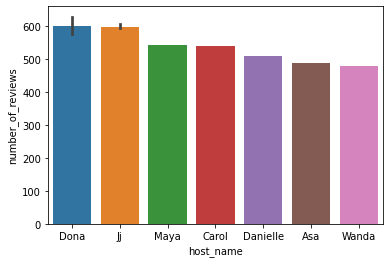

In [39]:
#Created a bar Graph to reflect the information. 
sns.barplot(x='host_name',y='number_of_reviews',data=df_Sort1);


In [40]:
#Created a new variable to understand which location have the most expensive room. 
df_3 = Df_Final[['neighbourhood_group','number_of_reviews','price']]
df_3

,neighbourhood_group,number_of_reviews,price
0,Brooklyn,9,149
1,Manhattan,45,225
2,Manhattan,0,150
3,Brooklyn,270,89
4,Manhattan,9,80
...,...,...,...
48890,Brooklyn,0,70
48891,Brooklyn,0,40
48892,Manhattan,0,115
48893,Manhattan,0,55


In [41]:
#Top 10 places with the most expensive rooms. 
df_sort2 = df_3.sort_values(['price'],ascending=False).head(10)
df_sort2


,neighbourhood_group,number_of_reviews,price
9151,Queens,2,10000
17692,Brooklyn,5,10000
29238,Manhattan,0,10000
40433,Manhattan,0,9999
12342,Manhattan,6,9999
6530,Manhattan,1,9999
30268,Manhattan,2,8500
4377,Brooklyn,1,8000
29662,Manhattan,0,7703
42523,Manhattan,0,7500


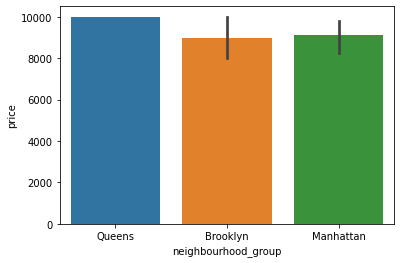

In [42]:
#created a bar graph for the same. 
sns.barplot(x='neighbourhood_group',y='price',data=df_sort2);

In [43]:
#Assigning 2 coulmns to a new variable to find out which host is providing the most expensive room. 
df_sort4 = Df_Final[['host_name','price']]
df_sort4

,host_name,price
0,John,149
1,Jennifer,225
2,Elisabeth,150
3,LisaRoxanne,89
4,Laura,80
...,...,...
48890,Sabrina,70
48891,Marisol,40
48892,Ilgar & Aysel,115
48893,Taz,55


In [44]:
df_sort4.loc[df_sort4['price'].idxmax()]

host_name    Kathrine
price           10000
Name: 9151, dtype: object

In [45]:
df_sort4.loc[df_sort4['price'].idxmin()]

host_name    Kimberly
price               0
Name: 23161, dtype: object

In [46]:
df_sort4['price'].mean()

152.7206871868289

In [47]:
#Finding out which hosts got highest number of reviews per month by assigning two columns to a new variable df_max2. 
df_Max2 = Df_Final[['host_name','reviews_per_month']]
df_Max2

,host_name,reviews_per_month
0,John,0.21
1,Jennifer,0.38
2,Elisabeth,0.00
3,LisaRoxanne,4.64
4,Laura,0.10
...,...,...
48890,Sabrina,0.00
48891,Marisol,0.00
48892,Ilgar & Aysel,0.00
48893,Taz,0.00


In [48]:
#Examining top 10 hosts with highest reviews per month. ""
df_reviewspm =  df_Max2.sort_values(['reviews_per_month'],ascending=False).head(10)
df_reviewspm

,host_name,reviews_per_month
42075,Row NYC,58.50
42076,Row NYC,27.95
38870,Louann,20.94
27287,Nalicia,19.75
28651,Nalicia,17.82
29628,Nalicia,16.81
20403,Danielle,16.22
22469,Danielle,16.03
36238,Brent,15.78
40297,Lakshmee,15.32


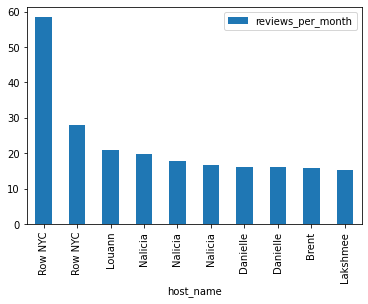

In [49]:
#Creating a Bar graph for the hosts with highest reviews per month.
df_reviewspm.plot(kind= 'bar', x = 'host_name')

In [50]:
Df_Final.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Which are the busiest hosts and why?

**Top 4 hosts with highest number of nights spent is in Manhattan and Brooklyn out of those 3 are providing Entire home/apt, Manhattan is considered to be financial,commercial and cultural hub**.

**Entire room and apt provides enough space to accommodate people, hence majority of them are opting for it**.

**Genevieve is the busiest host because she is providing entire home/apt at bit lower price also place plays an important factor**.


In [51]:
#Making a new variable named busiest host to get insights for different columns. 
busiest_host = Df_Final[['host_name','minimum_nights','neighbourhood_group','neighbourhood','reviews_per_month','room_type','price','number_of_reviews']]

In [52]:
DF_Busiest = busiest_host.sort_values(['minimum_nights'],ascending=False).head(10)
DF_Busiest

,host_name,minimum_nights,neighbourhood_group,neighbourhood,reviews_per_month,room_type,price,number_of_reviews
5767,Genevieve,1250,Manhattan,Greenwich Village,0.03,Entire home/apt,180,2
2854,Peter,1000,Manhattan,Battery Park City,0.00,Entire home/apt,400,0
38664,Meg,999,Manhattan,Greenwich Village,0.00,Shared room,110,0
13404,Glenn H.,999,Manhattan,Harlem,0.07,Entire home/apt,99,2
26341,Angie,999,Brooklyn,Williamsburg,1.12,Private room,79,24
47620,Meg,500,Brooklyn,Williamsburg,0.00,Entire home/apt,140,0
14285,Amanda,500,Brooklyn,Kensington,0.00,Private room,45,0
8014,John,500,Manhattan,Harlem,0.00,Entire home/apt,75,0
11193,Laura,500,Brooklyn,Crown Heights,0.22,Private room,50,10
7355,Aliya,500,Queens,Long Island City,0.57,Entire home/apt,134,30


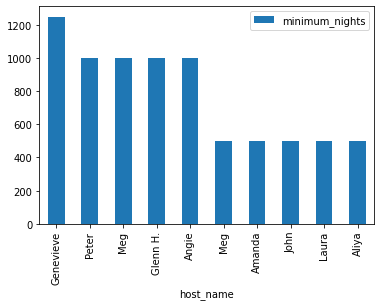

In [53]:
#Bar Graph reflects the corellation between hosts and minimum nights. 
DF_Busiest.plot(x = 'host_name', y = 'minimum_nights', kind = 'bar', legend = 'false')

Is there any noticeable difference of traffic among different areas and what could be the reason for it? 

**Manhattan has the highest number of visitors, the conclusion was made by analysing total minimum nights spent.**

**This is because Manhattan is  most economically powerful city and the leading financial center of the world, wall street is located in Manhattan.**

**Wall Street is based in Manhattan, it has an enduring impact not just on the American economy but also on the global one.**

**After Manhattan Brooklyn got the highest traffic, this is due to brooklyn is very famous after Manhattan, If Brooklyn were its own city like it used to be, it would be the third-most populous one in the country. However, the area is definitely worth discovering for it is the home of iconic New York attractions like Coney Island, the Brooklyn Bridge and Prospect Park.**


**Lowest Traffic was in  Queens, Staten Island and Bronx. These places does not have any economical impact. Queens have famous tourist spots, home to two of the three major NYC area airports, JFK International and LaGuardia. Tourist  attractions include Flushing Meadows Park—home to the New York Mets baseball team and the US Open tennis tournament—Kaufman Astoria Studios, Silvercup Studios, and Aqueduct Racetrack.**



In [53]:
# Assigning a new variable to get the 
df_traffic = Df_Final[['neighbourhood_group','minimum_nights']]
df_traffic

,neighbourhood_group,minimum_nights
0,Brooklyn,1
1,Manhattan,1
2,Manhattan,3
3,Brooklyn,1
4,Manhattan,10
...,...,...
48890,Brooklyn,2
48891,Brooklyn,4
48892,Manhattan,10
48893,Manhattan,1


In [54]:
df_traffic.sort_values(['minimum_nights'],ascending=False).head(10)

,neighbourhood_group,minimum_nights
5767,Manhattan,1250
2854,Manhattan,1000
38664,Manhattan,999
13404,Manhattan,999
26341,Brooklyn,999
47620,Brooklyn,500
14285,Brooklyn,500
8014,Manhattan,500
11193,Brooklyn,500
7355,Queens,500


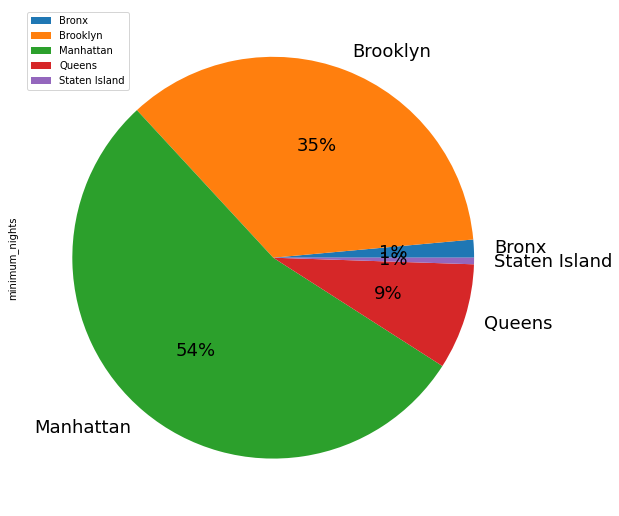

In [55]:
df_traffic.groupby(['neighbourhood_group']).sum().plot(
    kind='pie', y='minimum_nights', autopct='%1.0f%%', figsize = (9,11),fontsize=18)